How is the Body-Mass-Index related to Diabetes development in the human body?
Shown by different Regression methods

1. Ordinary Least Squares Regression

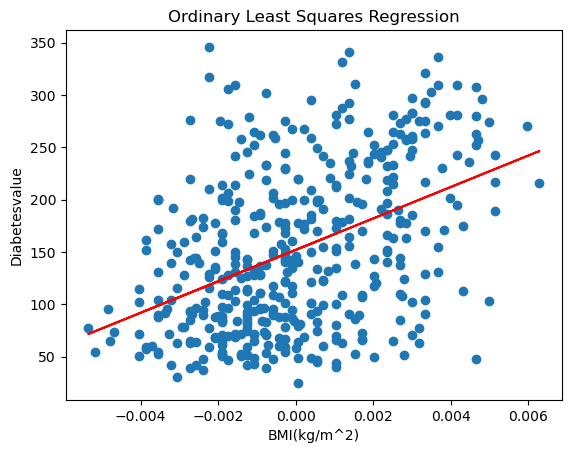

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:,3]
y = diabetes.target
std = diabetes.data.std(axis=0)[3]
mean = diabetes.data.mean(axis=0)[3]
bmireal = X * std + mean

def ordinary_least_squares(bmireal, y, mean=mean, std=std):
    xsum = np.sum(bmireal*y)
    x2sum = np.sum(bmireal**2)
    w = xsum / x2sum
    b = np.mean(y) - w * np.mean(bmireal)
    y_pred = w * bmireal + b
    return w, y_pred

def plot_regression(bmireal, y, y_pred, title):
    plt.scatter(bmireal, y)
    plt.plot(bmireal, y_pred, color='red')
    plt.xlabel('BMI')
    plt.ylabel('Diabetesvalue')
    plt.title(title)
    plt.show()
plot_regression(bmireal, y, ordinary_least_squares(bmireal, y)[1], 'Ordinary Least Squares Regression')
    


  